## Project 3

Store Analysis

In [7]:
# Import Packages

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

%matplotlib inline

In [8]:
liquor = pd.read_csv('../../../Iowa_Liquor_Sales_reduced.csv')

In [9]:
liquor.shape

(2709552, 18)

In [10]:
liquor = liquor.dropna(axis=0, how='any')


In [11]:
liquor.shape

(2692602, 18)

## Test Work

In [12]:
# Generate sample containing 5% of data
liquor_test = liquor.sample(frac=0.70)

In [13]:
liquor_test.shape

(1884821, 18)

In [14]:
liquor_test.head(3)



,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
2060296,04/28/2015,3963,COUNCIL BLUFFS,51501,78.0,Pottawattamie,1012100.0,CANADIAN WHISKIES,65,15246,Windsor Canadian,750,$4.20,$6.30,3,$18.90,2.25,0.59
658109,12/15/2015,4203,WAVERLY,50677,9.0,Bremer,1062300.0,FLAVORED RUM,35,43136,Bacardi Limon,750,$8.26,$12.39,24,$297.36,18.00,4.76
694487,12/08/2015,4310,CHEROKEE,51012,18.0,Cherokee,1071100.0,AMERICAN COCKTAILS,55,57179,Chi-Chi's Ruby Red Margarita,1750,$6.00,$9.25,2,$18.50,3.50,0.92


In [15]:
columns = liquor_test.columns.values # Pull columns

In [16]:
new_cols = []                        # Create new list for assignment
for column in columns:
    col = re.sub('\s+', '_', column) # Replace spaces with Underscores
    col = re.sub('[()]','',col)      # Replace paren with emptyspace
    new_cols.append(col)             # Add to columns list

In [17]:
# new_cols # Check to make sure conversion worked
liquor_test.columns = new_cols # Assign new column names

In [18]:
liquor_test.head()

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
2060296,04/28/2015,3963,COUNCIL BLUFFS,51501,78.0,Pottawattamie,1012100.0,CANADIAN WHISKIES,65,15246,Windsor Canadian,750,$4.20,$6.30,3,$18.90,2.25,0.59
658109,12/15/2015,4203,WAVERLY,50677,9.0,Bremer,1062300.0,FLAVORED RUM,35,43136,Bacardi Limon,750,$8.26,$12.39,24,$297.36,18.00,4.76
694487,12/08/2015,4310,CHEROKEE,51012,18.0,Cherokee,1071100.0,AMERICAN COCKTAILS,55,57179,Chi-Chi's Ruby Red Margarita,1750,$6.00,$9.25,2,$18.50,3.50,0.92
479864,01/11/2016,5108,BETTENDORF,52722,82.0,Scott,1081600.0,WHISKEY LIQUEUR,421,64858,Fireball Cinnamon Whiskey Mini Dispenser,3000,$29.72,$44.58,2,$89.16,6.00,1.59
1965467,05/13/2015,3947,BROOKLYN,52211,79.0,Poweshiek,1062310.0,SPICED RUM,259,43028,Admiral Nelson Spiced Rum,1750,$11.55,$17.33,6,$103.98,10.50,2.77


In [19]:
dollar_columns = ['State_Bottle_Cost',      # Pull cols with dollar values
                  'State_Bottle_Retail', 
                  'Sale_Dollars']

liquor_test[dollar_columns] = \
liquor_test[dollar_columns].replace(        # Replace:
    '[\$,]',                                # Dollar signs with:
    "",regex=True                           # Empty Space and
).astype(float)                             # Assign to float

In [20]:
liquor_test.dtypes # assess conversion

Date                    object
Store_Number             int64
City                    object
Zip_Code                object
County_Number          float64
County                  object
Category               float64
Category_Name           object
Vendor_Number            int64
Item_Number              int64
Item_Description        object
Bottle_Volume_ml         int64
State_Bottle_Cost      float64
State_Bottle_Retail    float64
Bottles_Sold             int64
Sale_Dollars           float64
Volume_Sold_Liters     float64
Volume_Sold_Gallons    float64
dtype: object

# Data Dictionary

|Name|Description|Variable Type|
|--|--|--|
|Store_Number|Unique Numerical ID for Liquor Stores in Iowa|Ordinal|
|City|City Where Store is Based|Categorical|
|Zip_Code|Zip Code of Store Location|Ordinal|
|County_Number|The County's Number as Assigned by the State of Iowa|Ordinal|
|County|County Name|Categorical|
|Category|Unique Numerical ID for Category of Sale|Ordinal|
|Category_Name|Category of Alcohol Sold|Categorical|
|Vendor_Number|Unique Numerical ID assigned to Vendor|Ordinal|
|Item_Number|Unique Numerical ID of the Item Sold|Ordinal|
|Item_Description|Description of the Item Sold|Categorical
|Bottle_Volume_ml|Volume of the Bottle Sold|Interval|
|State_Bottle_Cost|Cost of Bottle|Interval|
|State_Bottle_Retail|Cost of Bottle at Retail|Interval|
|Bottles_Sold|Number of Bottles Sold in Transaction|Ordinal|
|Sale_Dollars|Total Price of Sale in Dollars|Interval|
|Volume_Sold_Liters|Volume of Alcohol Sold in Liters|Interval|
|Volume_Sold_Gallons|Volume of Alcohol Sold in Gallons|Interval|


In [21]:
sale_Dollars = liquor_test[['County','Store_Number','Sale_Dollars']].groupby(['County','Store_Number']).sum()

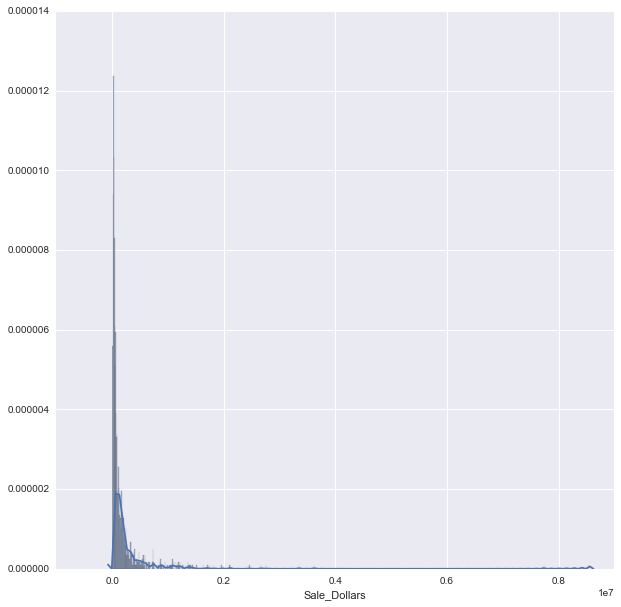

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(sale_Dollars['Sale_Dollars'],bins=1000)



In [23]:
# (liquor_test['Sale_Dollars'][liquor_test['Sale_Dollars'] < 15000]).sum()
(liquor_test['Sale_Dollars'][liquor_test['Sale_Dollars'] < 10000]).sum()

236064591.86968848

In [24]:
(liquor_test['Sale_Dollars'][liquor_test['Sale_Dollars'] > 10000]).sum()

7312626.029999986

In [25]:
425627.6399999999/(425627.6399999999+16814733.250002645)

0.024687861391974295

In [26]:
liquor_test['State_Bottle_Cost'].describe()

count    1.884821e+06
mean     9.810181e+00
std      1.714051e+01
min      8.900000e-01
25%      5.510000e+00
50%      8.000000e+00
75%      1.192000e+01
max      6.468000e+03
Name: State_Bottle_Cost, dtype: float64

In [27]:
liquor_test['State_Bottle_Retail'].describe()

count    1.884821e+06
mean     1.473108e+01
std      2.571050e+01
min      1.340000e+00
25%      8.270000e+00
50%      1.214000e+01
75%      1.788000e+01
max      9.702000e+03
Name: State_Bottle_Retail, dtype: float64

(0, 400)

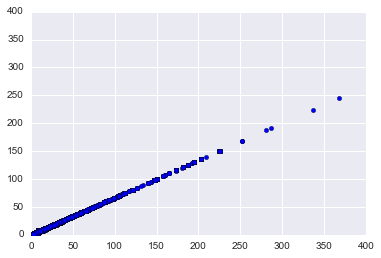

In [28]:
plt.scatter(data=liquor_test, x='State_Bottle_Retail', y= "State_Bottle_Cost")

plt.xlim(0, 400)
plt.ylim(0, 400)

In [29]:
liquor_test['Margins'] = liquor_test['State_Bottle_Retail']-liquor_test['State_Bottle_Cost']

In [30]:
liquor_test['Proportional Margins'] = liquor_test['Margins'] / liquor_test['State_Bottle_Retail']

(0, 100)

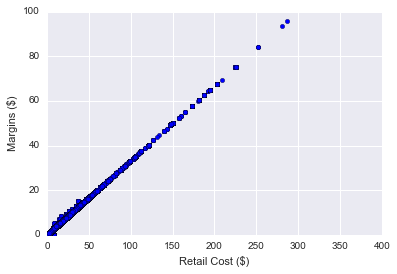

In [31]:
plt.scatter(data=liquor_test, x='State_Bottle_Retail', y= "Margins")


plt.xlabel("Retail Cost ($)")
plt.ylabel("Margins ($)")
plt.xlim(0, 400)
plt.ylim(0, 100)

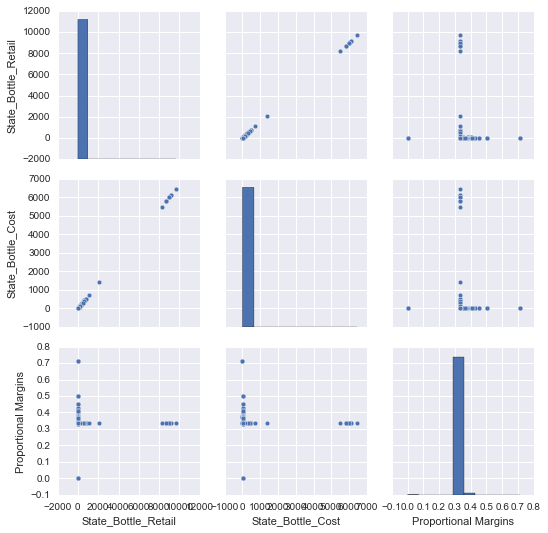

In [32]:
sns.pairplot(liquor_test[['State_Bottle_Retail','State_Bottle_Cost', 'Proportional Margins']])

In [37]:
liquor_test[liquor_test['Proportional Margins'] > 0].describe()

,Store_Number,County_Number,Category,Vendor_Number,Item_Number,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Margins,Proportional Margins
count,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06,1.884760e+06
mean,3.586352e+03,5.725015e+01,1.043825e+06,2.563088e+02,4.595558e+04,9.245377e+02,9.810226e+00,1.473129e+01,9.847126e+00,1.291283e+02,8.922175e+00,2.357194e+00,4.921062e+00,3.342244e-01
std,9.481327e+02,2.733179e+01,5.009392e+04,1.408934e+02,5.260578e+04,5.682248e+02,1.714078e+01,2.571089e+01,2.353450e+01,4.002270e+02,2.802693e+01,7.403919e+00,8.570424e+00,4.564196e-03
min,2.106000e+03,1.000000e+00,1.011100e+06,1.000000e+01,1.460000e+02,0.000000e+00,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,0.000000e+00,0.000000e+00,4.500000e-01,3.322204e-01
25%,2.604000e+03,3.100000e+01,1.012200e+06,1.150000e+02,2.682700e+04,7.500000e+02,5.510000e+00,8.270000e+00,2.000000e+00,3.045000e+01,1.500000e+00,4.000000e-01,2.760000e+00,3.333333e-01
50%,3.717000e+03,6.200000e+01,1.031200e+06,2.600000e+02,3.817600e+04,7.500000e+02,8.000000e+00,1.214000e+01,6.000000e+00,7.052000e+01,5.250000e+00,1.390000e+00,4.050000e+00,3.333333e-01
75%,4.378000e+03,7.700000e+01,1.062310e+06,3.800000e+02,6.460100e+04,1.000000e+03,1.192000e+01,1.788000e+01,1.200000e+01,1.350000e+02,1.050000e+01,2.770000e+00,5.960000e+00,3.336026e-01
max,9.023000e+03,9.900000e+01,1.701100e+06,9.780000e+02,9.955070e+05,2.250000e+05,6.468000e+03,9.702000e+03,3.960000e+03,1.063260e+05,3.960000e+03,1.046120e+03,3.234000e+03,7.142857e-01


In [42]:
new_liq_test = liquor_test.sort(['County', 'Sale_Dollars']).groupby(['County']).sum()

/Users/sebozek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [47]:
new_liq_test.head(2)

,Store_Number,County_Number,Category,Vendor_Number,Item_Number,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Margins,Proportional Margins
County,,,,,,,,,,,,,,
Adair,16060857,3875.0,4.025032e+09,1034605,161523919,3890625,35554.43,53416.13,30227,371204.26,29514.87,7795.65,17861.70,1295.989982
Adams,3534713,3038.0,1.588904e+09,396450,67399306,1521578,15449.26,23184.51,7057,84478.69,6353.84,1677.03,7735.25,506.347919


In [50]:
new_liq_test.sort(['Sale_Dollars'], ascending = False)

/Users/sebozek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Store_Number,County_Number,Category,Vendor_Number,Item_Number,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Margins,Proportional Margins
County,,,,,,,,,,,,,,
Polk,1227981926,26448345.0,3.579650e+11,88170215,16612811319,302948821,3.508365e+06,5.267654e+06,4069825,5.479459e+07,3500709.34,924952.390001,1.759289e+06,114779.998008
Linn,569378176,9224481.0,1.687643e+11,41648600,7543897741,140887971,1.570729e+06,2.358443e+06,1691879,2.159162e+07,1504176.16,397395.100000,7.877137e+05,54079.984293
Scott,424674722,9590720.0,1.220691e+11,29961663,5374101723,101066343,1.124783e+06,1.688802e+06,1432206,1.747123e+07,1134937.52,299870.320000,5.640189e+05,39082.262929
Johnson,321829596,4843020.0,9.708777e+10,23914325,4626760233,83341921,9.712500e+05,1.458286e+06,1062564,1.496774e+07,940943.28,248596.880000,4.870358e+05,31124.756931
Black Hawk,389866652,738969.0,1.103238e+11,27020387,4975690812,90269305,9.922504e+05,1.489943e+06,1212554,1.381412e+07,934573.52,246933.380000,4.976929e+05,35280.571737
Woodbury,215477414,5788184.0,6.233331e+10,15283300,2668015793,54110559,5.930411e+05,8.903917e+05,659734,8.666375e+06,577539.51,152593.930000,2.973506e+05,19936.687135
Pottawattamie,235708465,4996134.0,6.682875e+10,16146599,2908317860,56866959,6.032208e+05,9.056123e+05,664961,8.643460e+06,581842.28,153728.680000,3.023915e+05,21394.047196
Dubuque,180719968,1654904.0,5.570407e+10,13297148,2365089048,50541610,5.319220e+05,7.987611e+05,539394,7.389096e+06,515421.46,136169.780000,2.668392e+05,17845.052372
Story,225203505,5340125.0,6.551949e+10,16199063,2927532215,57955724,6.409519e+05,9.625527e+05,536051,7.365966e+06,519877.23,137352.110000,3.216008e+05,21006.124026
